In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn.svm import SVC, SVR
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [2]:
url = 'cancer.csv'
cancer_dataset = pd.read_csv(url)
target_variable = cancer_dataset.pop('diagnosis')
cancer_dataset.pop('Unnamed: 32')
target_df = pd.DataFrame({'diagnosis': target_variable})
features_df = cancer_dataset
features_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
feature_scaler = StandardScaler()
feature_scaler.fit(features_df)
scaled_features = feature_scaler.transform(features_df)
target_labels = target_df.values.ravel()
feature_count = features_df.shape[1]

linear_accuracies = []
linear_recalls = []
linear_precisions = []
linear_f1_scores = []
component_numbers = []

def evaluate_linear_svm(num_components, scaled_features, target_labels):
    # Perform PCA
    dimension_reducer = PCA(n_components=num_components)
    reduced_features = dimension_reducer.fit_transform(scaled_features)
    
    # Split dataset
    train_features, test_features, train_labels, test_labels = train_test_split(
        reduced_features, target_labels, test_size=0.20, random_state=0
    )
    
    # Train and evaluate model
    svm_model = SVC(kernel='linear', C=10)
    svm_model.fit(train_features, train_labels)
    predicted_labels = svm_model.predict(test_features)
    
    # Calculate performance metrics
    model_accuracy = metrics.accuracy_score(test_labels, predicted_labels)
    model_precision = metrics.precision_score(test_labels, predicted_labels, pos_label="M")
    model_recall = metrics.recall_score(test_labels, predicted_labels, pos_label="M")
    model_f1 = metrics.f1_score(test_labels, predicted_labels, pos_label="M")
    
    # Display results
    print(f"K = {num_components}: Accuracy: {model_accuracy:.4f}, Precision: {model_precision:.4f}, "
          f"Recall: {model_recall:.4f}, F1-Score: {model_f1:.4f}")
    
    # Store metrics
    linear_accuracies.append(model_accuracy * 100.0)
    linear_precisions.append(model_precision * 100.0)
    linear_recalls.append(model_recall * 100.0)
    linear_f1_scores.append(model_f1 * 100.0)
    component_numbers.append(num_components)

for comp_idx in range(feature_count):
    evaluate_linear_svm(comp_idx + 1, scaled_features, target_labels)

best_accuracy = max(linear_accuracies)
optimal_components = component_numbers[linear_accuracies.index(best_accuracy)]
print(f"The Highest Classification Accuracy Achieved using linear kernel: {best_accuracy:.2f}% "
      f"for K number = {optimal_components}")

K = 1: Accuracy: 0.9035, Precision: 0.8750, Recall: 0.8936, F1-Score: 0.8842
K = 2: Accuracy: 0.9211, Precision: 0.8800, Recall: 0.9362, F1-Score: 0.9072
K = 3: Accuracy: 0.9211, Precision: 0.8800, Recall: 0.9362, F1-Score: 0.9072
K = 4: Accuracy: 0.9474, Precision: 0.9362, Recall: 0.9362, F1-Score: 0.9362
K = 5: Accuracy: 0.9561, Precision: 0.9565, Recall: 0.9362, F1-Score: 0.9462
K = 6: Accuracy: 0.9561, Precision: 0.9565, Recall: 0.9362, F1-Score: 0.9462
K = 7: Accuracy: 0.9561, Precision: 0.9565, Recall: 0.9362, F1-Score: 0.9462
K = 8: Accuracy: 0.9561, Precision: 0.9565, Recall: 0.9362, F1-Score: 0.9462
K = 9: Accuracy: 0.9561, Precision: 0.9565, Recall: 0.9362, F1-Score: 0.9462
K = 10: Accuracy: 0.9386, Precision: 0.9167, Recall: 0.9362, F1-Score: 0.9263
K = 11: Accuracy: 0.9386, Precision: 0.9167, Recall: 0.9362, F1-Score: 0.9263
K = 12: Accuracy: 0.9474, Precision: 0.9184, Recall: 0.9574, F1-Score: 0.9375
K = 13: Accuracy: 0.9474, Precision: 0.9184, Recall: 0.9574, F1-Score: 0.

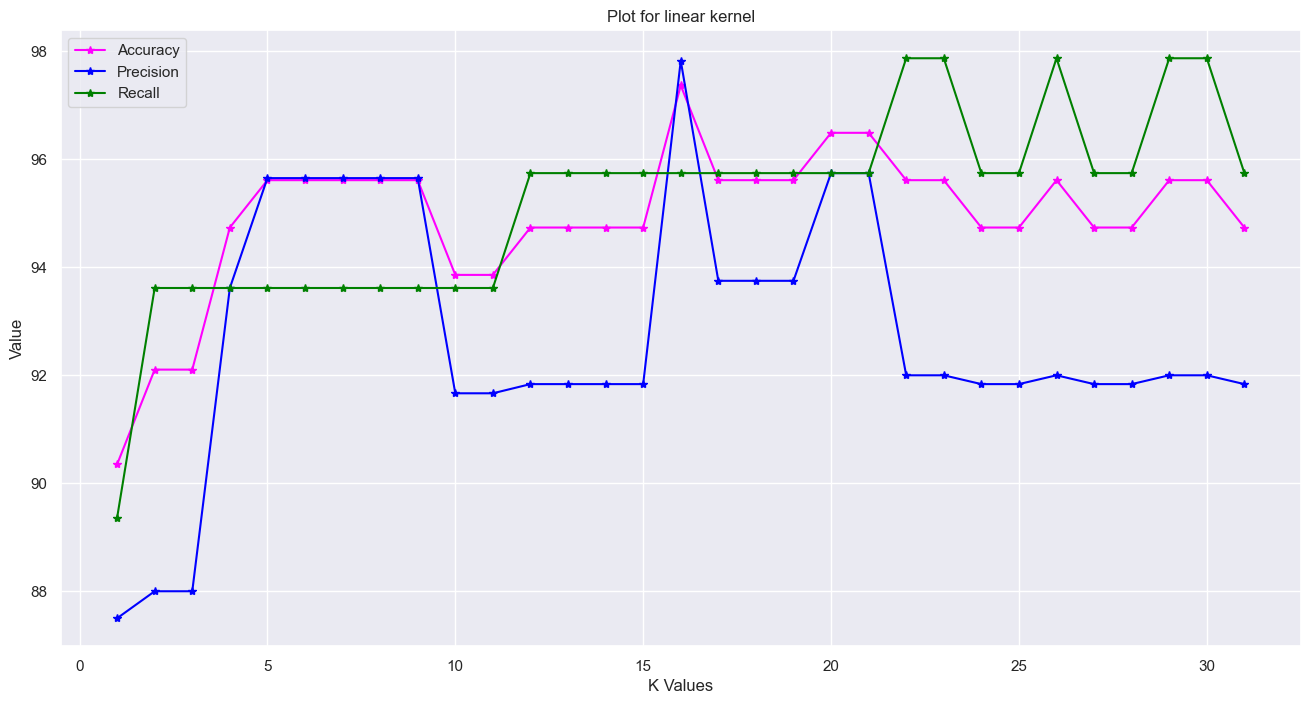

In [4]:
plt.figure(figsize=(16,8))
plt.plot(component_numbers, linear_accuracies, marker='*', linestyle='-', color='magenta', label='Accuracy')
plt.plot(component_numbers, linear_precisions, marker='*', linestyle='-', color='blue', label='Precision')
plt.plot(component_numbers, linear_recalls, marker='*', linestyle='-', color='green', label='Recall')
plt.title('Plot for linear kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
poly_accuracies = []
poly_precisions = []
poly_recalls = []
poly_f1_scores = []
poly_components = []

def evaluate_poly_svm(num_components, scaled_features, target_labels):
    # Perform PCA
    dimension_reducer = PCA(n_components=num_components)
    reduced_features = dimension_reducer.fit_transform(scaled_features)
    
    # Split dataset
    train_features, test_features, train_labels, test_labels = train_test_split(
        reduced_features, target_labels, test_size=0.20, random_state=0
    )
    
    # Train and evaluate model
    poly_model = SVC(kernel='poly', C=11)
    poly_model.fit(train_features, train_labels)
    predicted_labels = poly_model.predict(test_features)
    
    # Calculate metrics
    model_accuracy = metrics.accuracy_score(test_labels, predicted_labels)
    model_precision = metrics.precision_score(test_labels, predicted_labels, pos_label="M")
    model_recall = metrics.recall_score(test_labels, predicted_labels, pos_label="M")
    model_f1 = metrics.f1_score(test_labels, predicted_labels, pos_label="M")
    
    return model_accuracy, model_precision, model_recall, model_f1

# Evaluate polynomial kernel for different components
for comp_idx in range(feature_count):
    accuracy, precision, recall, f1_score = evaluate_poly_svm(comp_idx + 1, scaled_features, target_labels)
    
    # Print metrics
    print(f"K = {comp_idx + 1}: Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, "
          f"Recall: {recall:.4f}, F1-Score: {f1_score:.4f}")
    
    # Store metrics
    poly_accuracies.append(accuracy * 100)
    poly_precisions.append(precision * 100)
    poly_recalls.append(recall * 100)
    poly_f1_scores.append(f1_score * 100)
    poly_components.append(comp_idx + 1)

# Find best performance
best_poly_accuracy = max(poly_accuracies)
optimal_poly_components = poly_components[poly_accuracies.index(best_poly_accuracy)]
print(f"The Highest Classification Accuracy Achieved using polynomial kernel: {best_poly_accuracy:.2f}% "
      f"for K number = {optimal_poly_components}")


K = 1: Accuracy: 0.8596, Precision: 1.0000, Recall: 0.6596, F1-Score: 0.7949
K = 2: Accuracy: 0.9298, Precision: 0.9756, Recall: 0.8511, F1-Score: 0.9091
K = 3: Accuracy: 0.9298, Precision: 1.0000, Recall: 0.8298, F1-Score: 0.9070
K = 4: Accuracy: 0.9474, Precision: 0.9556, Recall: 0.9149, F1-Score: 0.9348
K = 5: Accuracy: 0.9649, Precision: 0.9778, Recall: 0.9362, F1-Score: 0.9565
K = 6: Accuracy: 0.9737, Precision: 1.0000, Recall: 0.9362, F1-Score: 0.9670
K = 7: Accuracy: 0.9737, Precision: 1.0000, Recall: 0.9362, F1-Score: 0.9670
K = 8: Accuracy: 0.9737, Precision: 1.0000, Recall: 0.9362, F1-Score: 0.9670
K = 9: Accuracy: 0.9825, Precision: 1.0000, Recall: 0.9574, F1-Score: 0.9783
K = 10: Accuracy: 0.9737, Precision: 1.0000, Recall: 0.9362, F1-Score: 0.9670
K = 11: Accuracy: 0.9737, Precision: 1.0000, Recall: 0.9362, F1-Score: 0.9670
K = 12: Accuracy: 0.9825, Precision: 1.0000, Recall: 0.9574, F1-Score: 0.9783
K = 13: Accuracy: 0.9737, Precision: 1.0000, Recall: 0.9362, F1-Score: 0.

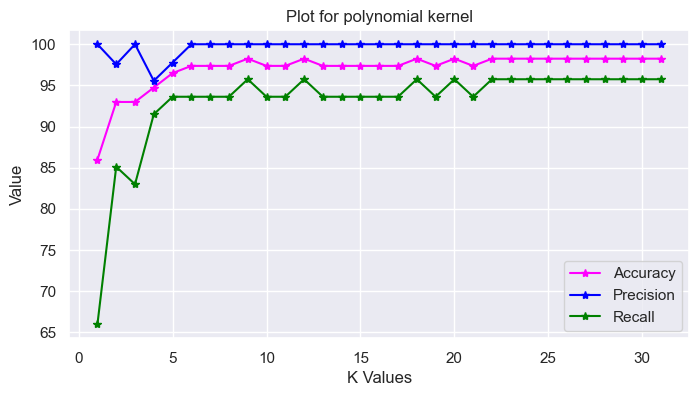

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(poly_components, poly_accuracies, marker='*', linestyle='-', color='magenta', label='Accuracy')
plt.plot(poly_components, poly_precisions, marker='*', linestyle='-', color='blue', label='Precision')
plt.plot(poly_components, poly_recalls, marker='*', linestyle='-', color='green', label='Recall')
plt.title('Plot for polynomial kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

def evaluate_pca_svm_performance(feature_data, target_data, kernel_type, regularization_param, 
                               max_components, test_size, random_state):
    # Initialize dictionary to store evaluation metrics
    performance_metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1score': [],
        'component_count': []
    }
    
    # Evaluate model for different component counts
    for num_components in range(1, max_components + 1):
        # Dimension reduction
        dimension_reducer = PCA(n_components=num_components)
        reduced_features = dimension_reducer.fit_transform(feature_data)
        
        # Split dataset
        train_features, test_features, train_labels, test_labels = train_test_split(
            reduced_features, target_data, test_size=test_size, random_state=random_state
        )
        
        # Train and evaluate model
        svm_model = SVC(kernel=kernel_type, C=regularization_param)
        svm_model.fit(train_features, train_labels)
        predicted_labels = svm_model.predict(test_features)
        
        # Calculate and store metrics
        performance_metrics['accuracy'].append(metrics.accuracy_score(test_labels, predicted_labels) * 100.0)
        performance_metrics['precision'].append(metrics.precision_score(test_labels, predicted_labels, pos_label="M") * 100.0)
        performance_metrics['recall'].append(metrics.recall_score(test_labels, predicted_labels, pos_label="M") * 100.0)
        performance_metrics['f1score'].append(metrics.f1_score(test_labels, predicted_labels, pos_label="M") * 100.0)
        performance_metrics['component_count'].append(num_components)
        
        # Display current iteration results
        print(f"K = {num_components}: "
              f"Accuracy = {performance_metrics['accuracy'][-1]:.2f}%, "
              f"Precision = {performance_metrics['precision'][-1]:.2f}%, "
              f"Recall = {performance_metrics['recall'][-1]:.2f}%, "
              f"F1-Score = {performance_metrics['f1score'][-1]:.2f}%")
    
    return performance_metrics

# Evaluate RBF kernel performance
rbf_metrics = evaluate_pca_svm_performance(scaled_features, target_labels, 'rbf', 11, 
                                         feature_count, 0.20, 0)

# Find optimal performance
best_accuracy_index = rbf_metrics['accuracy'].index(max(rbf_metrics['accuracy']))
best_rbf_accuracy = rbf_metrics['accuracy'][best_accuracy_index]
optimal_rbf_components = rbf_metrics['component_count'][best_accuracy_index]

# Display best performance
print(f"The Highest Classification Accuracy Achieved using RBF kernel: "
      f"{best_rbf_accuracy:.2f}% for K number = {optimal_rbf_components}")


K = 1: Accuracy = 89.47%, Precision = 85.71%, Recall = 89.36%, F1-Score = 87.50%
K = 2: Accuracy = 90.35%, Precision = 86.00%, Recall = 91.49%, F1-Score = 88.66%
K = 3: Accuracy = 92.11%, Precision = 91.30%, Recall = 89.36%, F1-Score = 90.32%
K = 4: Accuracy = 94.74%, Precision = 93.62%, Recall = 93.62%, F1-Score = 93.62%
K = 5: Accuracy = 95.61%, Precision = 95.65%, Recall = 93.62%, F1-Score = 94.62%
K = 6: Accuracy = 97.37%, Precision = 100.00%, Recall = 93.62%, F1-Score = 96.70%
K = 7: Accuracy = 97.37%, Precision = 100.00%, Recall = 93.62%, F1-Score = 96.70%
K = 8: Accuracy = 98.25%, Precision = 100.00%, Recall = 95.74%, F1-Score = 97.83%
K = 9: Accuracy = 98.25%, Precision = 97.87%, Recall = 97.87%, F1-Score = 97.87%
K = 10: Accuracy = 98.25%, Precision = 100.00%, Recall = 95.74%, F1-Score = 97.83%
K = 11: Accuracy = 98.25%, Precision = 100.00%, Recall = 95.74%, F1-Score = 97.83%
K = 12: Accuracy = 99.12%, Precision = 100.00%, Recall = 97.87%, F1-Score = 98.92%
K = 13: Accuracy = 

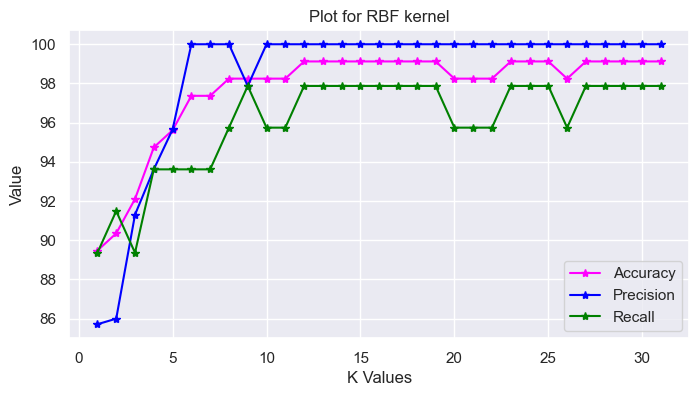

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(rbf_metrics['component_count'], rbf_metrics['accuracy'], 
         marker='*', linestyle='-', color='magenta', label='Accuracy')
plt.plot(rbf_metrics['component_count'], rbf_metrics['precision'], 
         marker='*', linestyle='-', color='blue', label='Precision')
plt.plot(rbf_metrics['component_count'], rbf_metrics['recall'], 
         marker='*', linestyle='-', color='green', label='Recall')
plt.title('Plot for RBF kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

Problem 2

In [9]:
url = 'Housing.csv'
housing_dataset = pd.read_csv(url)

In [10]:
def prepare_housing_data(dataset, feature_list):
    """Preprocess housing data by converting categorical variables and preparing features"""
    processed_data = dataset[feature_list].replace({'yes': 1, 'no': 0})
    feature_matrix = processed_data.iloc[:, 1:]
    sample_count = feature_matrix.shape[0]
    target_values = np.array(processed_data.iloc[:, 0], dtype=np.float64).reshape(sample_count, 1)
    feature_matrix = np.array(feature_matrix, dtype=np.float64)
    bias_term = np.ones((sample_count, 1))
    augmented_features = np.hstack((bias_term, feature_matrix))
    return augmented_features, target_values


In [11]:
from sklearn.preprocessing import MinMaxScaler
selected_features = [
    'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
    'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
    'parking', 'prefarea'
]

# Prepare and scale data
features_raw, target_values = prepare_housing_data(housing_dataset, selected_features)
feature_scaler = MinMaxScaler()
feature_scaler.fit(features_raw)
scaled_features = feature_scaler.transform(features_raw)

/var/folders/pd/3k9qxtc14ddbbpv444pvvy3m0000gn/T/ipykernel_12336/1002895750.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  processed_data = dataset[feature_list].replace({'yes': 1, 'no': 0})


In [12]:
def visualize_svr_predictions(scaled_features, target_values):
    """Perform SVR with different kernels and visualize results"""
    # Initialize SVR models
    svr_models = {
        'rbf': SVR(kernel='rbf', C=3e6, gamma=0.1),
        'linear': SVR(kernel='linear', C=2e5),
        'poly': SVR(kernel='poly', C=5e6, degree=2)
    }

    # Reduce dimensionality
    dimension_reducer = PCA(n_components=1)
    reduced_features = dimension_reducer.fit_transform(scaled_features)

    # Split dataset
    train_features, test_features, train_targets, test_targets = train_test_split(
        reduced_features, target_values, test_size=0.20, random_state=0
    )

    # Train models and get predictions
    predictions = {}
    for kernel_type, model in svr_models.items():
        model.fit(train_features, train_targets.ravel())
        predictions[kernel_type] = model.predict(test_features)

    # Prepare for plotting
    sort_indices = np.argsort(test_features.ravel())
    sorted_features = test_features[sort_indices].ravel()
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(sorted_features, test_targets[sort_indices].ravel(), 
               color='magenta', label='Data points')
    
    colors = {'rbf': 'cyan', 'linear': 'green', 'poly': 'navy'}
    for kernel_type, pred in predictions.items():
        plt.plot(sorted_features, pred[sort_indices].ravel(), 
                color=colors[kernel_type], lw=2, 
                label=f'{kernel_type.upper()} model')
    
    plt.xlabel('Reduced Feature')
    plt.ylabel('House Price')
    plt.title('Support Vector Regression Comparison')
    plt.legend()
    plt.show()

In [13]:
def evaluate_pca_svr_performance(scaled_features, target_values, n_components, model):
    """Perform PCA and evaluate SVR model"""
    dimension_reducer = PCA(n_components=n_components)
    reduced_features = dimension_reducer.fit_transform(scaled_features)
    
    train_features, test_features, train_targets, test_targets = train_test_split(
        reduced_features, target_values, train_size=0.8, random_state=0
    )
    
    model.fit(train_features, train_targets.ravel())
    predictions = model.predict(test_features)
    return test_targets, predictions

def calculate_model_metrics(actual_values, predicted_values):
    """Calculate RMSE and R² scores"""
    rmse_score = sqrt(mean_squared_error(actual_values, predicted_values))
    r2_score_value = r2_score(actual_values, predicted_values)
    return rmse_score, r2_score_value

# Evaluate models with different kernels
def evaluate_kernel_performance(kernel_type, kernel_params, scaled_features, target_values):
    """Evaluate SVR performance with specified kernel"""
    rmse_scores = []
    best_metrics = {
        'rmse': float('inf'),
        'r2': -float('inf'),
        'components': None
    }
    
    feature_count = scaled_features.shape[1]
    svr_model = SVR(kernel=kernel_type, **kernel_params)
    
    for num_components in range(1, feature_count):
        test_targets, predictions = evaluate_pca_svr_performance(
            scaled_features, target_values, num_components, svr_model
        )
        
        rmse, r2 = calculate_model_metrics(test_targets, predictions.ravel())
        rmse_scores.append(rmse)
        
        if rmse < best_metrics['rmse']:
            best_metrics.update({
                'rmse': rmse,
                'r2': r2,
                'components': num_components
            })
            
        print(f'Components={num_components}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')
    
    # Display results
    print(f"\n{kernel_type.upper()} Kernel Results:")
    print(f"Optimal number of components: {best_metrics['components']}")
    print(f"Best RMSE: {best_metrics['rmse']:.2f}")
    print(f"Corresponding R²: {best_metrics['r2']:.2f}")
    
    # Plot RMSE progression
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(rmse_scores) + 1), rmse_scores, 
            color='orchid' if kernel_type != 'linear' else 'cyan')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('RMSE Score')
    plt.title(f'RMSE Progression with {kernel_type.upper()} Kernel')
    plt.legend(['RMSE'])
    plt.grid(True)
    plt.show()
    
    return rmse_scores, best_metrics

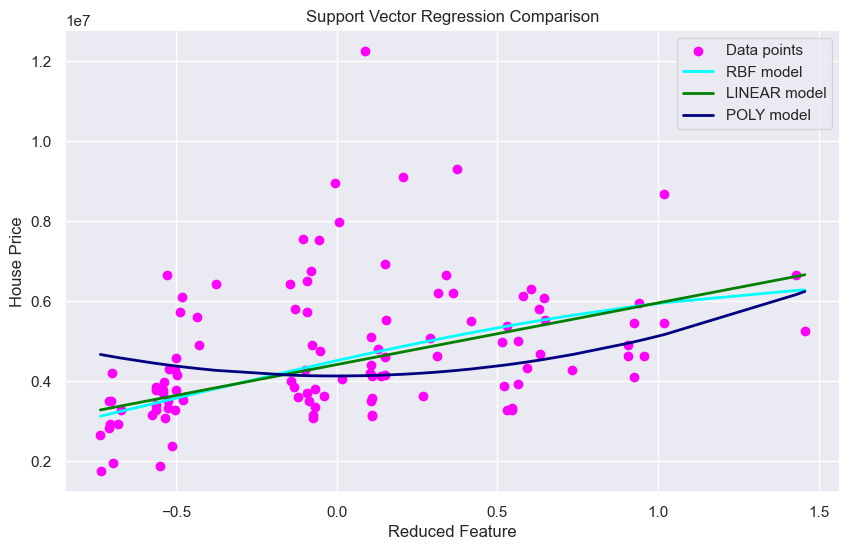

Components=1: RMSE = 1607985.34, R2 = 0.10
Components=2: RMSE = 1341873.86, R2 = 0.38
Components=3: RMSE = 1360158.03, R2 = 0.36
Components=4: RMSE = 1319655.91, R2 = 0.40
Components=5: RMSE = 1357628.15, R2 = 0.36
Components=6: RMSE = 1170199.18, R2 = 0.52
Components=7: RMSE = 1143340.00, R2 = 0.55
Components=8: RMSE = 1145924.56, R2 = 0.54
Components=9: RMSE = 1061108.34, R2 = 0.61
Components=10: RMSE = 1041682.42, R2 = 0.62
Components=11: RMSE = 1009279.75, R2 = 0.65

LINEAR Kernel Results:
Optimal number of components: 11
Best RMSE: 1009279.75
Corresponding R²: 0.65


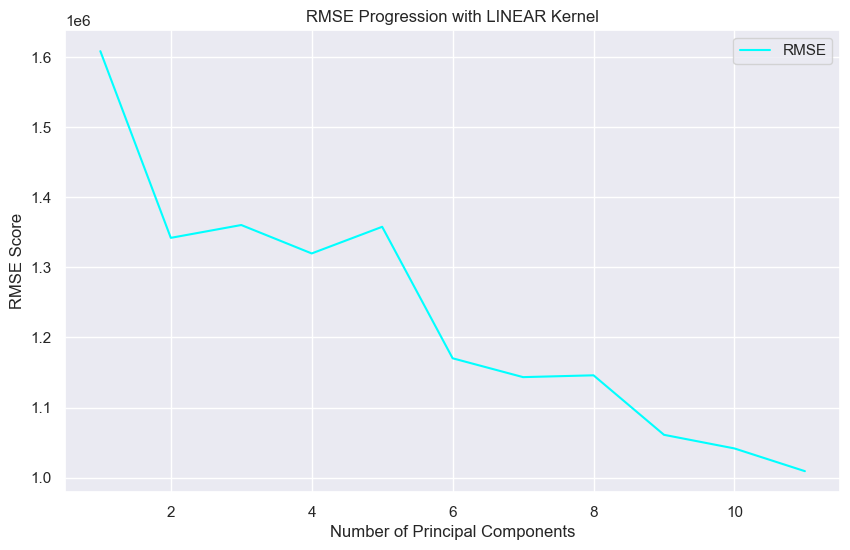

Components=1: RMSE = 1765331.32, R2 = -0.08
Components=2: RMSE = 1400402.08, R2 = 0.32
Components=3: RMSE = 1406860.09, R2 = 0.31
Components=4: RMSE = 1340587.50, R2 = 0.38
Components=5: RMSE = 1352283.01, R2 = 0.37
Components=6: RMSE = 1320589.34, R2 = 0.39
Components=7: RMSE = 1358998.40, R2 = 0.36
Components=8: RMSE = 1526251.74, R2 = 0.19
Components=9: RMSE = 1456279.28, R2 = 0.26
Components=10: RMSE = 1442978.69, R2 = 0.28
Components=11: RMSE = 1325909.03, R2 = 0.39

POLY Kernel Results:
Optimal number of components: 6
Best RMSE: 1320589.34
Corresponding R²: 0.39


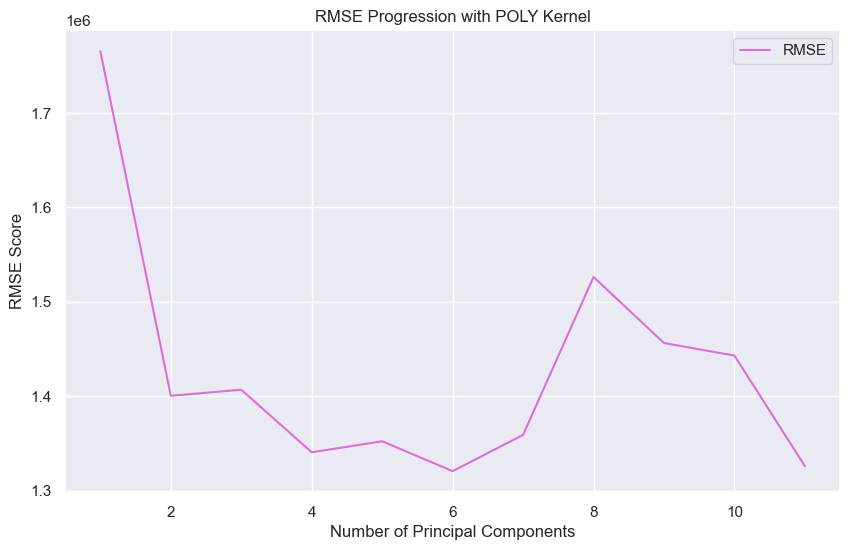

Components=1: RMSE = 1595919.61, R2 = 0.12
Components=2: RMSE = 1305471.19, R2 = 0.41
Components=3: RMSE = 1318173.01, R2 = 0.40
Components=4: RMSE = 1291308.92, R2 = 0.42
Components=5: RMSE = 1289024.80, R2 = 0.42
Components=6: RMSE = 1122000.15, R2 = 0.56
Components=7: RMSE = 1111893.80, R2 = 0.57
Components=8: RMSE = 1129742.21, R2 = 0.56
Components=9: RMSE = 1014164.73, R2 = 0.64
Components=10: RMSE = 986947.09, R2 = 0.66
Components=11: RMSE = 972404.91, R2 = 0.67

RBF Kernel Results:
Optimal number of components: 11
Best RMSE: 972404.91
Corresponding R²: 0.67


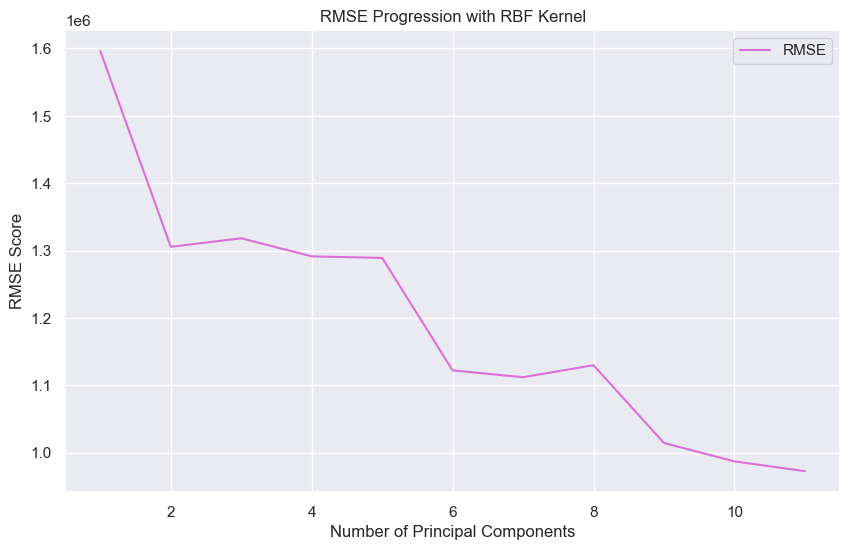

In [14]:
visualize_svr_predictions(scaled_features, target_values)

# Evaluate different kernels
kernel_configurations = {
    'linear': {'C': 2e5},
    'poly': {'C': 5e6, 'degree': 2},
    'rbf': {'C': 3e6, 'gamma': 0.1}
}

for kernel_type, params in kernel_configurations.items():
    evaluate_kernel_performance(kernel_type, params, scaled_features, target_values)


